**BEST MODEL RECEIVED FOR RNN MODEL**

In [0]:
embed_dim = 128
lstm_out = 200
batch_size = 32
epochs = 20
model = Sequential()

# Embedding layer
model.add(Embedding(2500, embed_dim,input_length = X.shape[1], dropout = 0.2))
  

# Masking layer for pre-trained embeddings
#model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='softmax'))

opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# Compile the model
model.compile(
    optimizer=opt , loss='categorical_crossentropy', metrics=['accuracy'])
Y = pd.get_dummies(data['sentiment']).values


history = model.fit(X_train, Y_train, batch_size =64,validation_data=(X_valid,Y_valid), epochs = epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.


Train on 1319 samples, validate on 330 samples
Epoch 1/20
1319/1319 [==============================] - 21s 16ms/step - loss: 1.0334 - acc: 0.4769 - val_loss: 0.9566 - val_acc: 0.5000
Epoch 2/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.9404 - acc: 0.5049 - val_loss: 0.9302 - val_acc: 0.5000
Epoch 3/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.9325 - acc: 0.5027 - val_loss: 0.9256 - val_acc: 0.5000
Epoch 4/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.9281 - acc: 0.5049 - val_loss: 0.9201 - val_acc: 0.5000
Epoch 5/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.9203 - acc: 0.5042 - val_loss: 0.9092 - val_acc: 0.5000
Epoch 6/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.9108 - acc: 0.5178 - val_loss: 0.8879 - val_acc: 0.4970
Epoch 7/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.8850 - acc: 0.5148 - val_loss: 0.8423 - val_acc: 0.6424
E

**MODEL PERFORMANCE**

In [0]:

loss,acc = model.evaluate(X_valid, Y_valid, verbose = 2, batch_size = batch_size)
print("Validation Loss: %.2f" % (loss))
print("Validation Accuracy: %.2f" % (acc))

Validation Loss: 0.77
Validation Accuracy: 0.64


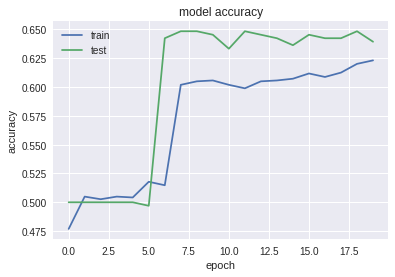

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

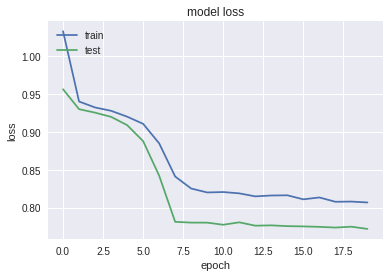

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictRnn = model.predict(X_valid)
predictRnn

array([[0.12653624, 0.5040641 , 0.3693997 ],
       [0.12862076, 0.5273007 , 0.34407857],
       [0.00578757, 0.03859925, 0.95561326],
       [0.12089962, 0.5143798 , 0.36472055],
       [0.12208344, 0.5141485 , 0.3637681 ],
       [0.13431181, 0.53285116, 0.332837  ],
       [0.01668411, 0.09361798, 0.88969797],
       [0.12332089, 0.5069566 , 0.36972255],
       [0.12245643, 0.5113953 , 0.3661483 ],
       [0.0778065 , 0.35304987, 0.56914365],
       [0.1273227 , 0.5258332 , 0.3468441 ],
       [0.1319768 , 0.5454544 , 0.3225689 ],
       [0.03634328, 0.17821091, 0.78544575],
       [0.12396943, 0.5209714 , 0.35505915],
       [0.11626296, 0.49207267, 0.39166436],
       [0.09076356, 0.3998534 , 0.509383  ],
       [0.12041552, 0.5122675 , 0.36731705],
       [0.08655712, 0.4103055 , 0.5031374 ],
       [0.11814039, 0.49965864, 0.382201  ],
       [0.1280456 , 0.5344671 , 0.33748722],
       [0.12804765, 0.5236025 , 0.34834987],
       [0.00570823, 0.03807186, 0.95621985],
       [0.

In [0]:
for r in predictRnn:
  maxValueIndex =r.argmax()
  #print(maxValueIndex)
  r[0] = 0.0
  r[1] = 0.0
  r[2] = 0.0
  r[maxValueIndex] = 1.0
  
  

**CONFUSION MATRIX**

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_valid.argmax(axis=1), predictRnn.argmax(axis =1)) 
print('Confusion Matrix :')
print(cm) 

Confusion Matrix :
[[  0  26   5]
 [  0 115  19]
 [  0  69  96]]


[]

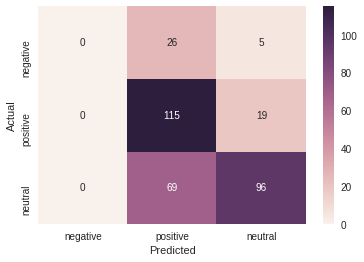

In [0]:
import seaborn as sns
LABELS = ['negative', 'positive','neutral']
a = sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS, fmt='g')
a.set(xlabel='Predicted', ylabel='Actual')
a.plot()
# xl = plt.xlabel("Predicted")

# yl = plt.ylabel("Actual")